Opening an Image

In [43]:
import cv2
from matplotlib import pyplot as plt
image_file =  "/content/Resume.PNG"
img = cv2.imread(image_file)

In [ ]:
#displaying-different-images-with actual-size-in-matplotlib-subplot
def display(im_path):
  dpi =  80
  im_data = plt.imread(im_path)
  height,width,depth = im_data.shape
  #what size does the figure need to be in inch to fit the image?
  figsize = width/float(dpi),height/float(dpi)

  #Create a figure of the right size with one axes that takes up the full figure
  fig = plt.figure(figsize=figsize)
  ax=fig.add_axes([0,0,1,1])

  #Hide spines,ticks, etc.
  ax.axis('off')

  #Display the image.
  ax.imshow(im_data,cmap='gray')

  plt.show()

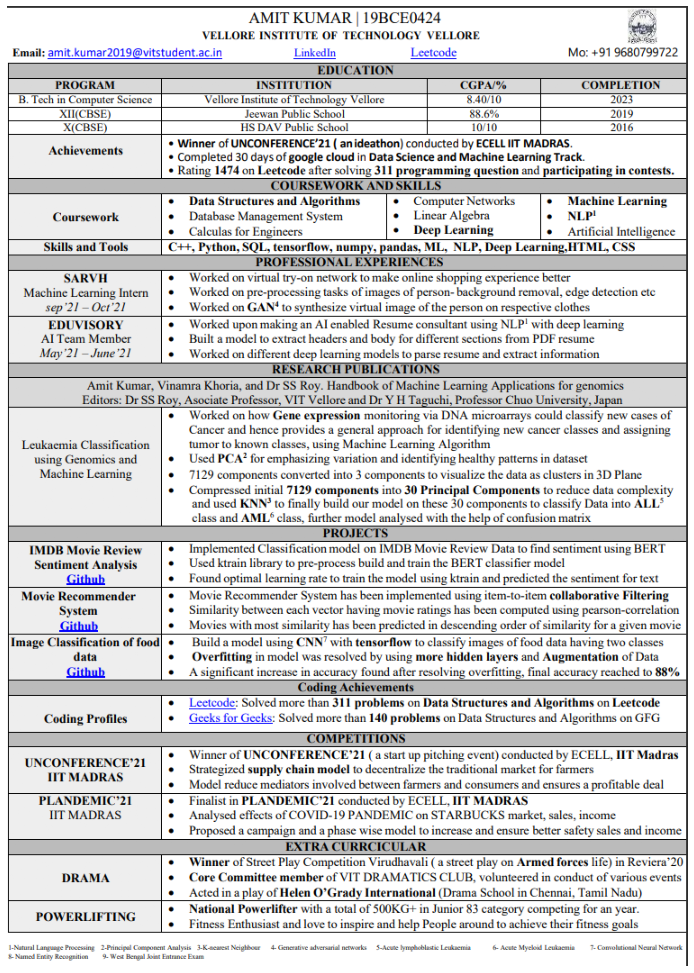

In [ ]:
display(image_file)

**Binarization**

In [ ]:
#COnvert an image into black and white
def grayscale(image):
  return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [ ]:
gray_image = grayscale(img)
cv2.imwrite("/content/gray.PNG",gray_image)

True

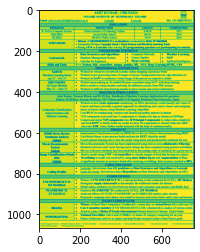

In [ ]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('gray.PNG'))

**Noise Removal**

In [ ]:
def noise_removal(image):
  import numpy as np
  kernal = np.ones((1,1),np.uint8)
  image = cv2.dilate(image,kernal,iterations=1)
  kernel = np.ones((1,1),np.uint8)
  image = cv2.erode(image,kernel,iterations=1)
  image = cv2.morpholoyEx(image,cv2,MORPH_CLOSE,kernel)
  image = cv2.medianBlur(image,3)
  return (image)

In [ ]:
no_noise = noise_removal(img)
cv2.imwrite("/no_noise.jpg",no_noise)

**Missing Borders**


In [ ]:
color = [255,255,255]
top, buttom, left, right = [150]*4


In [ ]:
image_with_border = cv2.copyMakeBorder(image_file,top,buttom,left,right,cv2.BORDER_CONSTANT,value = color)
cv2.imwrite("/content/image_with_border.PNG",image_with_border)
display("/content/image_with_border.PNG")